In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [3]:
# Reading .parquet File
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\veh crash\Motor_Vehicle_Collisions_Crashes.parquet')

#Formatting to date format and extracting year & month
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['crash_year']=df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.strftime('%b')
df['date'] = df['CRASH DATE'].dt.day
df['day']=df['CRASH DATE'].dt.strftime('%a')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218398 entries, 0 to 2218397
Data columns (total 33 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64         
 15  NUMBER OF CYCLI

- What is the trend of crashes over the years ?

In [4]:
plot1=df.groupby('crash_year').size().reset_index(name='count')
plot1

,crash_year,count
0,2012,100545
1,2013,203742
2,2014,206046
3,2015,217707
4,2016,229831
5,2017,231007
6,2018,231564
7,2019,211486
8,2020,112917
9,2021,110557


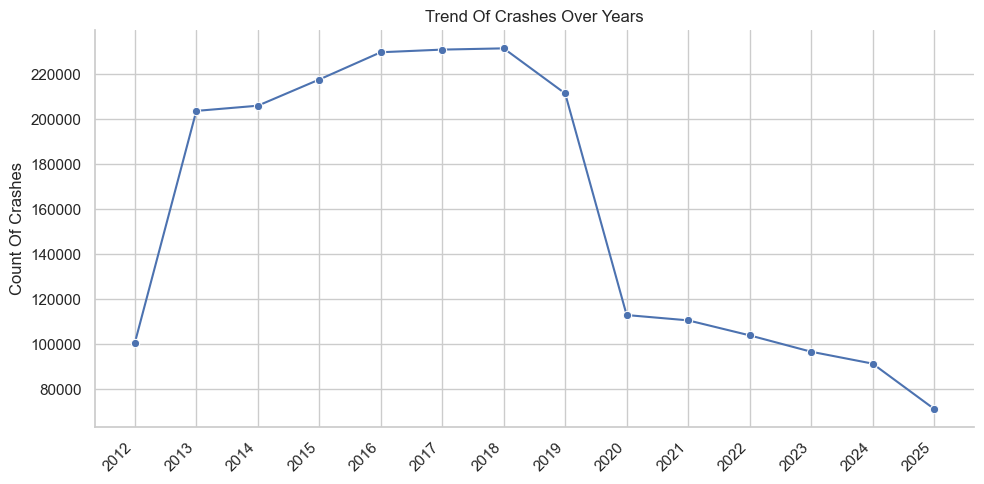

In [5]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=plot1,x='crash_year',y='count',marker='o',dashes=False)

plt.xlabel('')
plt.ylabel('Count Of Crashes')
plt.title('Trend Of Crashes Over Years')

ax.set_xticks(plot1['crash_year'].unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

sns.despine()
plt.tight_layout()
plt.show()


- Which months, date & days of the week show the highest number of crashes?

In [6]:
df['month'] = pd.Categorical(df['month'],
                                  categories=['Jan','Feb','Mar','Apr','May','Jun',
                                              'Jul','Aug','Sep','Oct','Nov','Dec'],
                                  ordered=True)

In [7]:
plot2=df.groupby('month',observed=True).size().reset_index(name='count')
plot2

,month,count
0,Jan,170587
1,Feb,157500
2,Mar,176748
3,Apr,164317
4,May,188409
5,Jun,189214
6,Jul,199804
7,Aug,196931
8,Sep,197781
9,Oct,203660


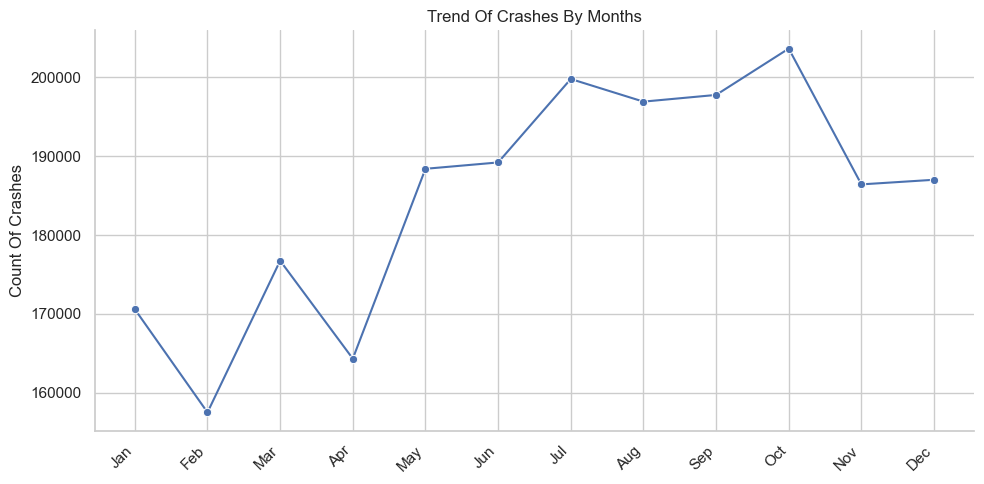

In [8]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=plot2,x='month',y='count',marker='o',dashes=False)

plt.xlabel('')
plt.ylabel('Count Of Crashes')
plt.title('Trend Of Crashes By Months')

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

sns.despine()
plt.tight_layout()
plt.show()


In [9]:
df['day'] = pd.Categorical(df['day'],
                                  categories=['Sun','Mon','Tue','Wed','Thu','Fri',
                                              'Sat'],
                                  ordered=True)

In [10]:
plot3=df.groupby('day',observed=True).size().reset_index(name='count')
plot3

,day,count
0,Sun,268233
1,Mon,316784
2,Tue,325906
3,Wed,323591
4,Thu,331167
5,Fri,352972
6,Sat,299745


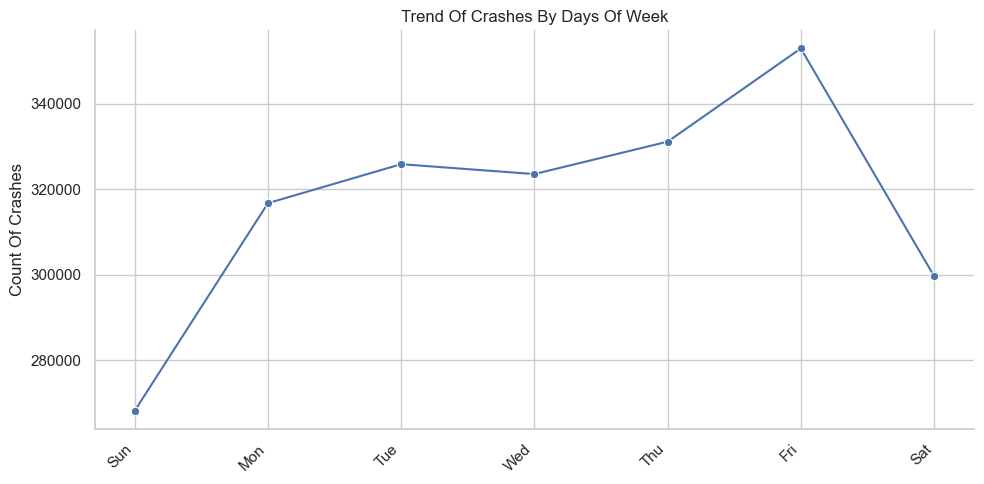

In [11]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=plot3,x='day',y='count',marker='o',dashes=False)

plt.xlabel('')
plt.ylabel('Count Of Crashes')
plt.title('Trend Of Crashes By Days Of Week')

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

sns.despine()
plt.tight_layout()
plt.show()

In [12]:
plot4=df.groupby('date',observed=True).size().reset_index(name='count')
plot4

,date,count
0,1,72553
1,2,72542
2,3,73676
3,4,71087
4,5,72753
5,6,73791
6,7,73057
7,8,72851
8,9,72510
9,10,73251


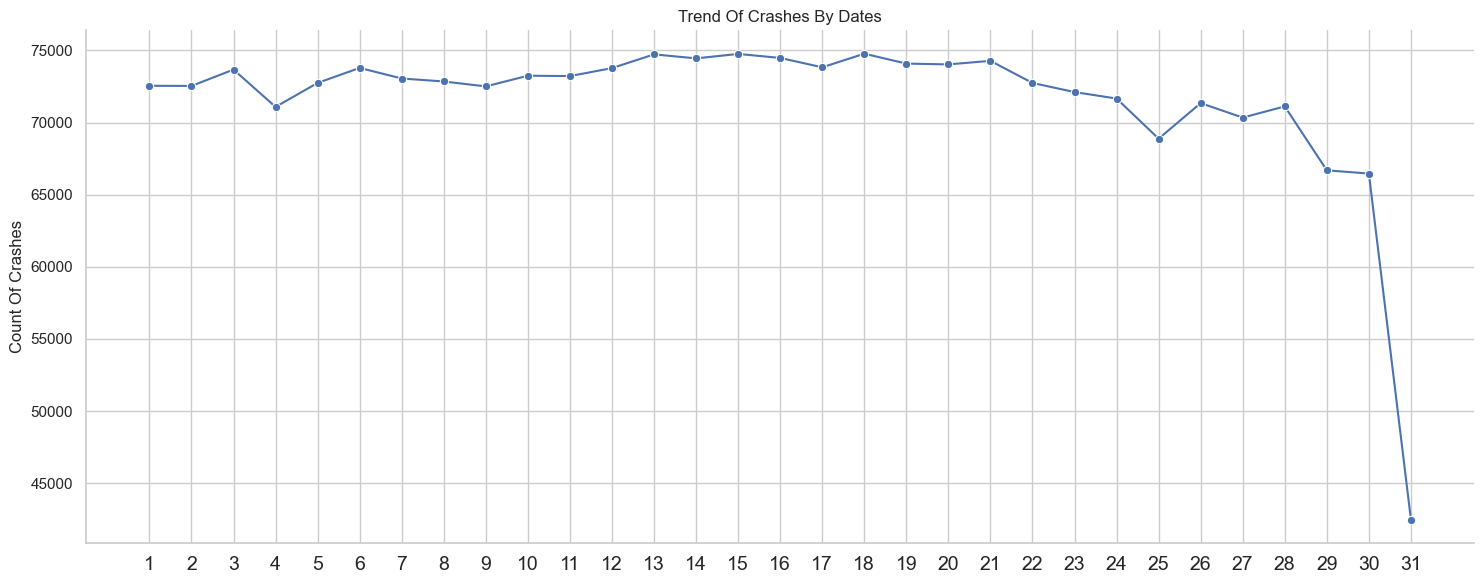

In [13]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,6))
ax=sns.lineplot(data=plot4,x='date',y='count',marker='o',dashes=False)

plt.xlabel('')
plt.ylabel('Count Of Crashes')
plt.title('Trend Of Crashes By Dates')

ax.set_xticks(plot4['date'].unique())
plt.setp(ax.get_xticklabels(),fontsize=14,ha='center')

sns.despine()
plt.tight_layout()
plt.show()

- What times of day have the most accidents (rush hour patterns)?

In [14]:
df['CRASH TIME'] = df['CRASH TIME'].astype(str)
df['hour'] = df['CRASH TIME'].str.split(':').str[0].astype(float)

bins = [0, 6, 10, 14, 18, 22, 24]
labels = ['Late Night(0-6)', 'Morning Rush(6-10)', 'Midday(10-14)', 'Afternoon(14-18)', 'Evening Rush(18-22)', 'Late Evening(22-24)']

df['time_bucket'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

In [15]:
plot5=df.groupby('time_bucket',observed=True).size().reset_index(name='count')
plot5

,time_bucket,count
0,Late Night(0-6),233105
1,Morning Rush(6-10),356867
2,Midday(10-14),470478
3,Afternoon(14-18),597868
4,Evening Rush(18-22),424457
5,Late Evening(22-24),135623


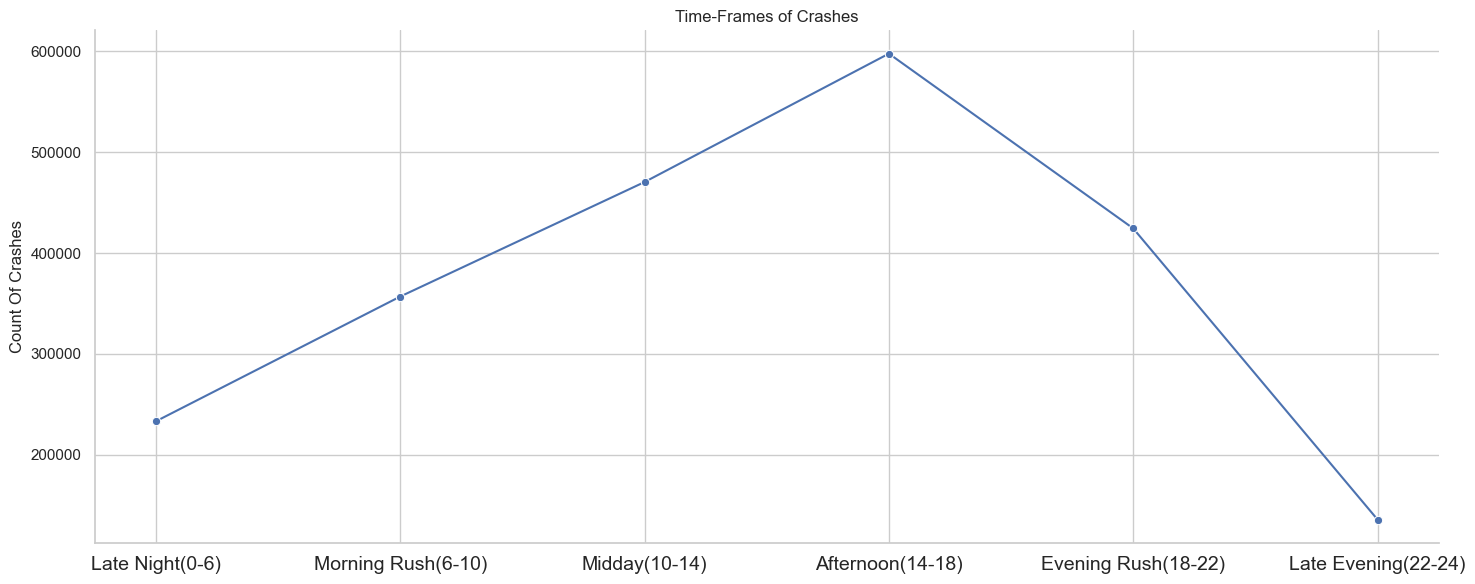

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,6))
ax=sns.lineplot(data=plot5,x='time_bucket',y='count',marker='o',dashes=False)

plt.xlabel('')
plt.ylabel('Count Of Crashes')
plt.title('Time-Frames of Crashes')

plt.setp(ax.get_xticklabels(),fontsize=14,ha='center')

sns.despine()
plt.tight_layout()
plt.show()